# Homework

```
Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.
```

## Dataset

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

Or you can do it with `wget`:

```
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
    ```

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.

In [1]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

In [2]:
!wget $data

--2025-10-13 20:09:53--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: 'course_lead_scoring.csv'

     0K .......... .......... .......... .......... .......... 63% 2,43M 0s
    50K .......... .......... ........                        100% 4,97M=0,03s

2025-10-13 20:09:54 (2,99 MB/s) - 'course_lead_scoring.csv' saved [80876/80876]



## Data preparation

- Check if the missing values are presented in the features.
- If there are missing values:
  - For caterogiral features, replace them with 'NA'
  - For numerical features, replace with with 0.0

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('course_lead_scoring.csv')

In [5]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [6]:
df.shape

(1462, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [8]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [9]:
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [11]:
numerical = [
    'number_of_courses_viewed', 
    'annual_income', 
    'interaction_count', 
    'lead_score']

In [12]:
categorical = [
    'lead_source', 
    'industry', 
    'employment_status', 
    'location']

In [26]:
df['annual_income'] = df['annual_income'].fillna(0.0)

In [27]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income                 0
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [28]:
for c in categorical:
    df[c] = df[c].fillna('NA')

In [29]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

## Question 1

What is the most frequent observation (mode) for the column `industry`?
- NA
- technology
- healthcare
- retail

**Answer: retail**

In [30]:
df['industry'].describe()

count       1462
unique         8
top       retail
freq         203
Name: industry, dtype: object

In [31]:
df['industry'].value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

## Question 2
Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?
- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `interaction_count`

Only consider the pairs above when answering this question.

**Answer: annual_income and interaction_count**

In [33]:
df[numerical].corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


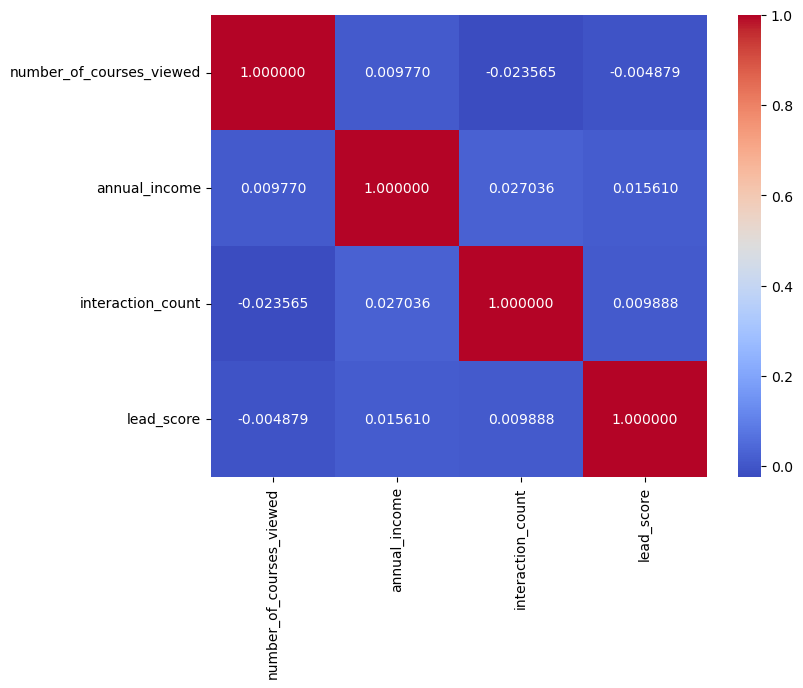

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical].corr(), annot=True, cmap='coolwarm', fmt='.6f')
plt.show()

In [42]:
df[['interaction_count', 'lead_score']].corr()

,interaction_count,lead_score
interaction_count,1.000000,0.009888
lead_score,0.009888,1.000000


In [44]:
df[['number_of_courses_viewed', 'lead_score']].corr()

,number_of_courses_viewed,lead_score
number_of_courses_viewed,1.000000,-0.004879
lead_score,-0.004879,1.000000


In [47]:
df[['number_of_courses_viewed', 'interaction_count']].corr()

,number_of_courses_viewed,interaction_count
number_of_courses_viewed,1.000000,-0.023565
interaction_count,-0.023565,1.000000


In [48]:
df[['annual_income', 'interaction_count']].corr()

,annual_income,interaction_count
annual_income,1.000000,0.027036
interaction_count,0.027036,1.000000


In [53]:
l = [0.009888, -0.004879, -0.023565, 0.027036]
l.sort()
print(l)

[-0.023565, -0.004879, 0.009888, 0.027036]


## Split the data
- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
- Make sure that the target value `y` is not in your dataframe.

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [57]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [61]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [65]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [66]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

## Question 3
- Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
- `industry`
- `location`
- `lead_source`
- `employment_status`

**Answer: `lead_source`**

In [70]:
from sklearn.metrics import mutual_info_score

In [79]:
def mutual_info_converted_score(series):
    return round(mutual_info_score(series, df_full_train.converted), 2)

In [80]:
mi = df_full_train[categorical].apply(mutual_info_converted_score)
mi.sort_values(ascending=False)

lead_source          0.03
industry             0.01
employment_status    0.01
location             0.00
dtype: float64

## Question 4
- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
  - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
  - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?
- 0.64
- 0.74
- 0.84
- 0.94

**Answer: 0.74**

In [119]:
from sklearn.feature_extraction import DictVectorizer

In [120]:
dv = DictVectorizer(sparse=False)

In [121]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [122]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [125]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [126]:
from sklearn.metrics import accuracy_score

In [127]:
y_pred = model.predict(X_val)

In [128]:
accuracy_score(y_val, y_pred)

0.6996587030716723

In [129]:
test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [130]:
y_pred = model.predict(X_test)

In [131]:
accuracy_score(y_test, y_pred)

0.726962457337884

In [132]:
round(accuracy_score(y_test, y_pred), 2)

0.73

In [133]:
accuracy_ori = accuracy_score(y_test, y_pred)
accuracy_ori

0.726962457337884

## Question 5
- Let's find the least useful feature using the *feature elimination* technique.
- Train a model using the same features and parameters as in Q4 (without rounding).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?
- `'industry'`
- `'employment_status'`
- `'lead_score'`

```
Note: The difference doesn't have to be positive.
```

**Answer: `lead_score`**

In [101]:
df_full_train.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [135]:
train_dict_no_lead_score = df_train[['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count']].to_dict(orient='records')
X_train_no_lead_score = dv.fit_transform(train_dict_no_lead_score)

In [136]:
test_dict_no_lead_score = df_test[['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count']].to_dict(orient='records')
X_test_no_lead_score = dv.transform(test_dict_no_lead_score)

In [137]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [138]:
model.fit(X_train_no_lead_score, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [141]:
y_pred_no_lead_score = model.predict(X_test_no_lead_score)

In [165]:
accuracy_score(y_test, y_pred_no_lead_score)

0.7337883959044369

In [166]:
accuracy_no_lead_score = accuracy_score(y_test, y_pred_no_lead_score)
accuracy_no_lead_score

0.7337883959044369

In [167]:
abs(accuracy_ori - accuracy_no_lead_score)

0.0068259385665528916

In [168]:
train_dict_no_employment_status = df_train[['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income', 'location', 'interaction_count', 'lead_score']].to_dict(orient='records')
X_train_no_employment_status = dv.fit_transform(train_dict_no_employment_status)

In [169]:
test_dict_no_employment_status = df_test[['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income', 'location', 'interaction_count', 'lead_score']].to_dict(orient='records')
X_test_no_employment_status = dv.transform(test_dict_no_employment_status)

In [170]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [171]:
model.fit(X_train_no_employment_status, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [172]:
y_pred_no_employment_status = model.predict(X_test_no_employment_status)

In [173]:
accuracy_no_employment_status = accuracy_score(y_test, y_pred_no_employment_status)
accuracy_no_employment_status

0.7406143344709898

In [174]:
abs(accuracy_ori - accuracy_no_employment_status)

0.013651877133105783

In [175]:
train_dict_no_industry = df_train[['lead_source', 'number_of_courses_viewed', 'annual_income', 'employment_status', 'location', 'interaction_count', 'lead_score']].to_dict(orient='records')
X_train_no_industry = dv.fit_transform(train_dict_no_industry)

In [176]:
test_dict_no_industry = df_test[['lead_source', 'number_of_courses_viewed', 'annual_income', 'employment_status', 'location', 'interaction_count', 'lead_score']].to_dict(orient='records')
X_test_no_industry = dv.transform(test_dict_no_industry)

In [178]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [179]:
model.fit(X_train_no_industry, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [180]:
y_pred_no_industry = model.predict(X_test_no_industry)

In [181]:
accuracy_no_industry = accuracy_score(y_test, y_pred_no_industry)
accuracy_no_industry

0.7372013651877133

In [182]:
abs(accuracy_ori - accuracy_no_industry)

0.010238907849829282

## Question 6
- Now let's train a regularized logistic regression.
- Let's try the following values of the parameter `C: [0.01, 0.1, 1, 10, 100]`.
- Train models using all the features as in Q4.
- Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these C leads to the best accuracy on the validation set?
- 0.01
- 0.1
- 1
- 10
- 100

```
Note: If there are multiple options, select the smallest `C`.
```

**Answer: 0.01**

In [183]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [184]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [193]:
c_values= [0.01, 0.1, 1, 10, 100]
train_accuracies = []
val_accuracies = []
models = []

In [196]:
for c in c_values:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    models.append(model)
    
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)
        
    y_val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_acc)
    
    print(f"C: {c}, Train Accuracy: {train_acc:.3f}, Val Accuracy: {val_acc:.3f}")
    
best_c_index = np.argmax(val_accuracies)
best_c = c_values[best_c_index]
best_model = models[best_c_index]

print(f"\nOptimal C value based on val accuracy: {best_c}")
print(f"Val accuracy with optimal C: {val_accuracies[best_c_index]:.3f}")

C: 0.01, Train Accuracy: 0.747, Val Accuracy: 0.700
C: 0.1, Train Accuracy: 0.740, Val Accuracy: 0.700
C: 1, Train Accuracy: 0.739, Val Accuracy: 0.700
C: 10, Train Accuracy: 0.739, Val Accuracy: 0.700
C: 100, Train Accuracy: 0.739, Val Accuracy: 0.700

Optimal C value based on val accuracy: 0.01
Val accuracy with optimal C: 0.700


In [188]:
model = LogisticRegression(solver='liblinear', C=0.01, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(round(accuracy_score(y_val, y_pred), 3))

0.6996587030716723
0.7


In [189]:
model = LogisticRegression(solver='liblinear', C=0.1, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(round(accuracy_score(y_val, y_pred), 3))

0.6996587030716723
0.7


In [190]:
model = LogisticRegression(solver='liblinear', C=1, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(round(accuracy_score(y_val, y_pred), 3))

0.6996587030716723
0.7


In [191]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(round(accuracy_score(y_val, y_pred), 3))

0.6996587030716723
0.7


In [192]:
model = LogisticRegression(solver='liblinear', C=100, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(round(accuracy_score(y_val, y_pred), 3))

0.6996587030716723
0.7
